In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('Social_Network_Ads.csv')

In [50]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
298,15675791,Male,45,79000,0
267,15581282,Male,37,74000,0
143,15783029,Male,30,89000,0
50,15694395,Female,24,32000,0
262,15672821,Female,55,125000,1


In [51]:
df.shape

(400, 5)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


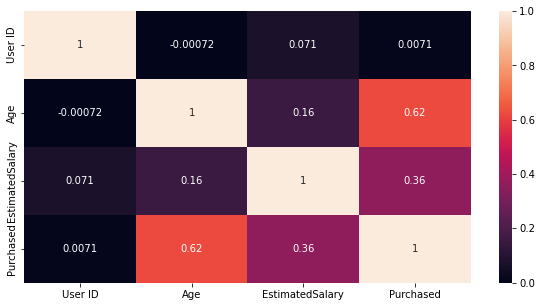

In [53]:
# plot the correlation between every column to other columns
# to figure out the relation between them
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

```From above plot we can see that, there is good correlation between age 
and the Purchased column, which means age can determine if the person 
or not.```

```And also there is good relation between estimated salary and purchased.```

In [54]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [55]:
def check_dup(dataf):
    for x in dataf.duplicated():
        if x:
            return 'There are duplicates'
    return "No duplicates"

In [56]:
check_dup(df)

'No duplicates'

In [57]:
df.drop(['User ID'],axis='columns',inplace=True)

In [58]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

## Applying algorithm after Column Transform in Pipeline

In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [61]:
trf = ColumnTransformer(transformers = [
    ('trf2',StandardScaler(),['Age','EstimatedSalary']),
    ('trf1',OneHotEncoder(drop='first',sparse=False),['Gender']),
],remainder='passthrough')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [63]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression())
])

In [64]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf2', StandardScaler(),
                                                  ['Age', 'EstimatedSalary']),
                                                 ('trf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['Gender'])])),
                ('step2', LogisticRegression())])

In [65]:
y_pred = pipe.predict(X_test)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
accuracy_score(y_test,y_pred)

0.825

In [68]:
import pickle

In [69]:
pickle.dump(pipe,open('pipe.pkl','wb'))

In [74]:
input_df = pd.DataFrame({'Age':[30],'EstimatedSalary':[150000],'Gender':['Male']})
pipe.predict(input_df)

array([1])

In [75]:
pred = pickle.load(open('pipe.pkl','rb'))

In [76]:
pred.predict_proba(input_df)

array([[0.38280703, 0.61719297]])